# Support Vector Machines

## Setup

In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Support-Vector-Machines"):
    raise ValueError("Please change working directory to 'path/Classifying-the-MNIST' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Support-Vector-Machines


In [2]:
!pip install -r requirements.txt

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [4]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Train SVM classifier

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42, dual=True))

svm_clf.fit(X.values, y)
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [6]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

## Decision Boundary

In [7]:
from sklearn.svm import SVC

X = X[(iris.target == 0) | (iris.target == 1)]
y = iris.target[(iris.target == 0) | (iris.target == 1)]


svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X.values, y)

SVC(C=1e+100, kernel='linear')

In [10]:
def plt_svc(svm_clf):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(0, 5.5, 500)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    margin = 1/w[1]
    support_vectors = svm_clf.support_vectors_
    support_vectors
    plt.plot(x0, decision_boundary, "k")
    plt.plot(x0, decision_boundary - margin, "k--")
    plt.plot(x0, decision_boundary + margin, "k--")
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, c="grey", alpha=0.8,zorder=-1)
    plt.axis([0, 5.5, 0, 2])
    plt.legend(loc="lower right")

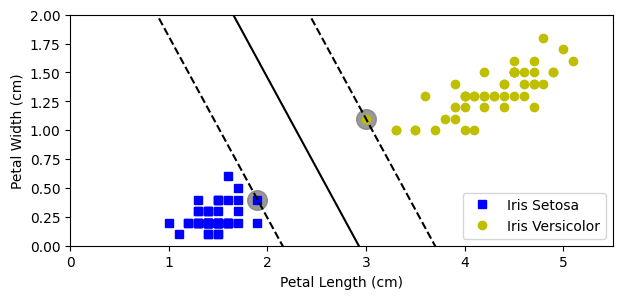

In [37]:
plt.figure(figsize=(7, 3))
plt.plot(X["petal length (cm)"][y==0], X["petal width (cm)"][y==0], "bs", label="Iris Setosa")
plt.plot(X["petal length (cm)"][y==1], X["petal width (cm)"][y==1], "yo", label="Iris Versicolor")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt_svc(svm_clf)
plt.show()

## Hard margin vs Soft Margin

In [23]:
outlier = np.array([[3.2, 0.8]])

X_o = np.concatenate([X.values, outlier])
y_o = np.concatenate([y, np.array([0])])

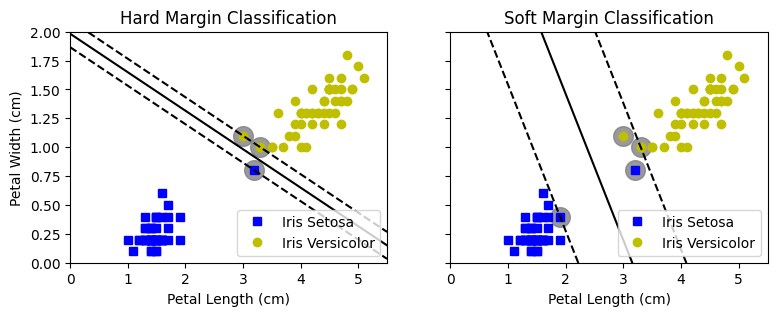

In [44]:
svm_clf_hard = SVC(kernel="linear", C=10**9)
svm_clf_soft = SVC(kernel="linear", C=1)

svm_clf_hard.fit(X_o, y_o)
svm_clf_soft.fit(X_o, y_o)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 3), sharey=True)

plt.sca(ax1)
plt.title("Hard Margin Classification")
plt.plot(X_o[:, 0][y_o==0], X_o[:, 1][y_o==0], "bs", label="Iris Setosa")
plt.plot(X_o[:, 0][y_o==1], X_o[:, 1][y_o==1], "yo", label="Iris Versicolor")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt_svc(svm_clf_hard)

plt.sca(ax2)
plt.title("Soft Margin Classification")
plt.plot(X_o[:, 0][y_o==0], X_o[:, 1][y_o==0], "bs", label="Iris Setosa")
plt.plot(X_o[:, 0][y_o==1], X_o[:, 1][y_o==1], "yo", label="Iris Versicolor")
plt.xlabel("Petal Length (cm)")
plt_svc(svm_clf_soft)